In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 27. Aggregate using one or more operations
<pre>Usage: df.aggregate(func=None, axis=0, *args, **kwargs)
Given Input: 
df = pd.read_csv('iris.csv')

Requirement: 
Find out mean, median and std of each species.
</pre>

In [2]:
df = pd.read_csv('iris.csv')
df.sample(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
88,5.6,3.0,4.1,1.3,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica


In [3]:
df.groupby('Name').agg(['mean','median','std'])

SepalLength                  SepalWidth                   \
                       mean median       std       mean median       std   
Name                                                                       
Iris-setosa           5.006    5.0  0.352490      3.418    3.4  0.381024   
Iris-versicolor       5.936    5.9  0.516171      2.770    2.8  0.313798   
Iris-virginica        6.588    6.5  0.635880      2.974    3.0  0.322497   

                PetalLength                  PetalWidth                   
                       mean median       std       mean median       std  
Name                                                                      
Iris-setosa           1.464   1.50  0.173511      0.244    0.2  0.107210  
Iris-versicolor       4.260   4.35  0.469911      1.326    1.3  0.197753  
Iris-virginica        5.552   5.55  0.551895      2.026    2.0  0.274650

## 28. Call function on self producing a DataFrame with the same column
<pre>Call func on self producing a DataFrame with 
the same axis shape as self.
</pre>

In [4]:
df['SpeciesArea'] = df['SepalWidth'].transform(lambda x: x**2*np.pi)
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SpeciesArea
4,5.0,3.6,1.4,0.2,Iris-setosa,40.715041
17,5.1,3.5,1.4,0.3,Iris-setosa,38.484510
62,6.0,2.2,4.0,1.0,Iris-versicolor,15.205308
19,5.1,3.8,1.5,0.3,Iris-setosa,45.364598
37,4.9,3.1,1.5,0.1,Iris-setosa,30.190705


## 29. DataFrame rename
<pre>Create a df2 to record 'PetalLength' mean of each species
Rename the 'PetalLength' in df2 to 'PetalLengthMedian' 
Desired Output:
Name	        PetalLengthMean
Iris-setosa	    1.50
Iris-versicolor	4.35
Iris-virginica	 5.55
</pre>

In [5]:
df2 = df[['Name','PetalLength']].groupby('Name').agg('median')
df2

,PetalLength
Name,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [6]:
df2 = df2.rename(columns={'PetalLength':'PetalLengthMedian'})
df2

,PetalLengthMedian
Name,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


## 30. Merge 2 DataFrame by key
<pre>Merge DataFrame or named Series objects with a database-style join.
Requirement:
Merge df and df2 with key 'Name'
</pre>

In [7]:
df = df.merge(df2, left_on='Name', right_on='Name')
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SpeciesArea,PetalLengthMedian
141,6.9,3.1,5.1,2.3,Iris-virginica,30.190705,5.55
131,7.9,3.8,6.4,2.0,Iris-virginica,45.364598,5.55
80,5.5,2.4,3.8,1.1,Iris-versicolor,18.095574,4.35
54,6.5,2.8,4.6,1.5,Iris-versicolor,24.630086,4.35
49,5.0,3.3,1.4,0.2,Iris-setosa,34.211944,1.50


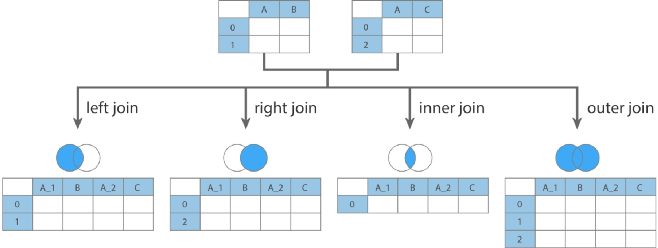

In [8]:
# More test
df1 = pd.read_csv('iris.csv')
pd.merge(df, df2, on="Name", how="outer")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SpeciesArea,PetalLengthMedian_x,PetalLengthMedian_y
0,5.1,3.5,1.4,0.2,Iris-setosa,38.484510,1.50,1.50
1,4.9,3.0,1.4,0.2,Iris-setosa,28.274334,1.50,1.50
2,4.7,3.2,1.3,0.2,Iris-setosa,32.169909,1.50,1.50
3,4.6,3.1,1.5,0.2,Iris-setosa,30.190705,1.50,1.50
4,5.0,3.6,1.4,0.2,Iris-setosa,40.715041,1.50,1.50
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,28.274334,5.55,5.55
146,6.3,2.5,5.0,1.9,Iris-virginica,19.634954,5.55,5.55
147,6.5,3.0,5.2,2.0,Iris-virginica,28.274334,5.55,5.55
148,6.2,3.4,5.4,2.3,Iris-virginica,36.316811,5.55,5.55


In [9]:
pd.merge(df1, df2, on="Name", how="left")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,PetalLengthMedian
0,5.1,3.5,1.4,0.2,Iris-setosa,1.50
1,4.9,3.0,1.4,0.2,Iris-setosa,1.50
2,4.7,3.2,1.3,0.2,Iris-setosa,1.50
3,4.6,3.1,1.5,0.2,Iris-setosa,1.50
4,5.0,3.6,1.4,0.2,Iris-setosa,1.50
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,5.55
146,6.3,2.5,5.0,1.9,Iris-virginica,5.55
147,6.5,3.0,5.2,2.0,Iris-virginica,5.55
148,6.2,3.4,5.4,2.3,Iris-virginica,5.55


## 31. Plot with Pandas DF
Plot with Pandas DF. The default plotting backend of Pandas is Matplotlib. You may plot simple graph with DF without import Matplotlib or other visualisation tools.

<AxesSubplot:ylabel='Frequency'>

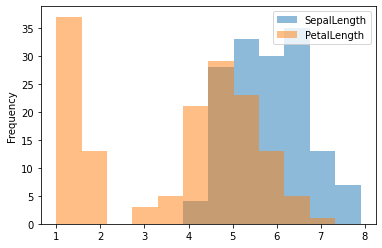

In [10]:
df[['SepalLength','PetalLength']].plot.hist(bins=12, alpha=0.5)

In [11]:
df.plot

<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

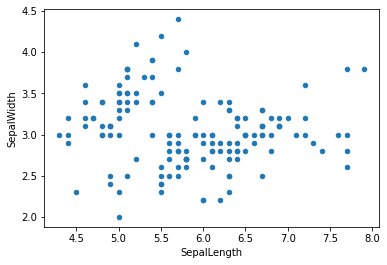

In [12]:
df.plot.scatter(x='SepalLength', y='SepalWidth')

<AxesSubplot:ylabel='Density'>

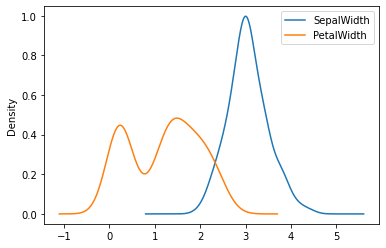

In [13]:
df[['SepalWidth','PetalWidth']].plot.kde()

## 32. Save DataFrame

In [14]:
df.to_html('test.html')

In [15]:
df.to_csv('test.csv')

In [16]:
df.to_markdown('test.md')  

## 33. Pandas dtype
<pre>The default Pandas dtype: 
real number dtype is float64
Int number dtype is int64
String is object</pre>


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalLength        150 non-null    float64
 1   SepalWidth         150 non-null    float64
 2   PetalLength        150 non-null    float64
 3   PetalWidth         150 non-null    float64
 4   Name               150 non-null    object 
 5   SpeciesArea        150 non-null    float64
 6   PetalLengthMedian  150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [18]:
d = {'col1': [1, 2], 
     'col2': [3., 4.], 
     'col3': ['user1', 'user2']}
df3 = pd.DataFrame(data=d)
df3.dtypes

col1      int64
col2    float64
col3     object
dtype: object

In [19]:
d = {'col1': np.array([1,2]), 
     'col2': np.array([3.,4.]), 
     'col3': ['user1', 'user2']}
df3 = pd.DataFrame(data=d)
df3.dtypes

col1      int64
col2    float64
col3     object
dtype: object

In [20]:
df3.memory_usage()

Index    128
col1      16
col2      16
col3      16
dtype: int64

In [21]:
df3.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 3 entries, col1 to col3
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


## 34. Check int64 and float64 range

In [22]:
import sys
sys.maxsize

9223372036854775807

In [23]:
type(sys.maxsize)

int

In [24]:
sys.maxsize == 2**63 - 1

True

In [25]:
2**63 - 1

9223372036854775807

## 35. Change numeric column Dtype to float16

In [26]:
# Before trim down the dtype, memory usage: 9.4+ KB
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Columns: 7 entries, SepalLength to PetalLengthMedian
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [27]:
# Trim all numeric column to float16
df[['SepalLength','SepalWidth','PetalLength','PetalWidth','SpeciesArea']] = df[
    ['SepalLength','SepalWidth','PetalLength','PetalWidth','SpeciesArea']].astype(np.float16)

In [28]:
# After trim down the dtype, memory usage: 5.0+ KB
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Columns: 7 entries, SepalLength to PetalLengthMedian
dtypes: float16(5), float64(1), object(1)
memory usage: 5.0+ KB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalLength        150 non-null    float16
 1   SepalWidth         150 non-null    float16
 2   PetalLength        150 non-null    float16
 3   PetalWidth         150 non-null    float16
 4   Name               150 non-null    object 
 5   SpeciesArea        150 non-null    float16
 6   PetalLengthMedian  150 non-null    float64
dtypes: float16(5), float64(1), object(1)
memory usage: 5.0+ KB


In [30]:
# Max of float16
np.finfo(np.float16).max

65500.0

In [31]:
# Min of float16
np.finfo(np.float16).min

-65500.0

In [32]:
# Max of int64
np.iinfo(np.int64).max

9223372036854775807

In [33]:
# Min of int64
np.iinfo(np.int64).min

-9223372036854775808

In [34]:
# Max of uint64
np.iinfo(np.uint64).max

18446744073709551615

In [35]:
# Min of uint64
np.iinfo(np.uint64).min

0

## 36. Calculates the difference of a DataFrame element compared with another element in the DataFrame 

In [36]:
df[['SepalLength','PetalLength']]

,SepalLength,PetalLength
0,5.101562,1.400391
1,4.898438,1.400391
2,4.699219,1.299805
3,4.601562,1.500000
4,5.000000,1.400391
...,...,...
145,6.699219,5.199219
146,6.300781,5.000000
147,6.500000,5.199219
148,6.199219,5.398438


In [37]:
df[['SepalLength','PetalLength']].diff(axis=1)

,SepalLength,PetalLength
0,NaN,-3.701172
1,NaN,-3.498047
2,NaN,-3.398438
3,NaN,-3.101562
4,NaN,-3.599609
...,...,...
145,NaN,-1.500000
146,NaN,-1.300781
147,NaN,-1.300781
148,NaN,-0.800781


In [38]:
df[['SepalLength','PetalLength']].diff()

,SepalLength,PetalLength
0,NaN,NaN
1,-0.203125,0.000000
2,-0.199219,-0.100586
3,-0.097656,0.200195
4,0.398438,-0.099609
...,...,...
145,0.000000,-0.500000
146,-0.398438,-0.199219
147,0.199219,0.199219
148,-0.300781,0.199219


## 37. Get item from object for given key
<pre>Given a wather DF, use .get() to retrieve windspeed value on '2020-02-13'
weather = pd.DataFrame(
    [   [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"],
    index=pd.date_range(start="2020-02-12", end="2020-02-15", freq="D"),
)</pre>

In [61]:
weather = pd.DataFrame(
    [   [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"],
    index=pd.date_range(start="2020-02-12", end="2020-02-15", freq="D"),
)
weather

,temp_celsius,temp_fahrenheit,windspeed
2020-02-12,24.3,75.7,high
2020-02-13,31.0,87.8,high
2020-02-14,22.0,71.6,medium
2020-02-15,35.0,95.0,medium


In [40]:
weather['windspeed'].get('2020-02-13')

'high'

In [41]:
weather['windspeed'].get('2023-05-20', default="No found")

'No found'

## 38. DataFrame representation

In [42]:
# Return a tuple representing the dimensionality of the DataFrame
weather.shape

(4, 3)

In [43]:
# Return an int representing the number of elements in this object.
weather.size

12

In [44]:
# Return an int representing the number of axes / array dimensions
# Return 1 if Series. Otherwise return 2 if DataFrame.
weather.ndim

2

## 39. DataFrame representation

In [45]:
# Return a list representing the axes of the DataFrame.
weather.axes

[DatetimeIndex(['2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15'], dtype='datetime64[ns]', freq='D'),
 Index(['temp_celsius', 'temp_fahrenheit', 'windspeed'], dtype='object')]

In [46]:
# Return a Numpy representation of the DataFrame
weather.values

array([[24.3, 75.7, 'high'],
       [31.0, 87.8, 'high'],
       [22.0, 71.6, 'medium'],
       [35.0, 95.0, 'medium']], dtype=object)

In [47]:
# The column labels of the DataFrame
weather.columns

Index(['temp_celsius', 'temp_fahrenheit', 'windspeed'], dtype='object')

## 40. Insert new column with values

In [62]:
weather.insert(3,'sunny', [False, True, False, True])
weather

,temp_celsius,temp_fahrenheit,windspeed,sunny
2020-02-12,24.3,75.7,high,False
2020-02-13,31.0,87.8,high,True
2020-02-14,22.0,71.6,medium,False
2020-02-15,35.0,95.0,medium,True


## 41. Insert new data row
<pre>Requirement:
Add '2020-02-16' as datetime index, and row data
[31.0, 87.8, 'medium', True] to DF weather.
</pre>

In [64]:
weather.loc[pd.to_datetime('2020-02-16',format='%Y-%m-%d')] = [31.0, 87.8, 'medium', True]
weather

,temp_celsius,temp_fahrenheit,windspeed,sunny
2020-02-12,24.3,75.7,high,False
2020-02-13,31.0,87.8,high,True
2020-02-14,22.0,71.6,medium,False
2020-02-15,35.0,95.0,medium,True
2020-02-16,31.0,87.8,medium,True


## 42. Change Datetime indext to another type

In [68]:
weather.index = weather.index.strftime('%Y-%m-%d 00:00:00')

In [70]:
weather

,temp_celsius,temp_fahrenheit,windspeed,sunny
2020-02-12 00:00:00,24.3,75.7,high,False
2020-02-13 00:00:00,31.0,87.8,high,True
2020-02-14 00:00:00,22.0,71.6,medium,False
2020-02-15 00:00:00,35.0,95.0,medium,True
2020-02-16 00:00:00,31.0,87.8,medium,True


In [69]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2020-02-12 00:00:00 to 2020-02-16 00:00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_celsius     5 non-null      float64
 1   temp_fahrenheit  5 non-null      float64
 2   windspeed        5 non-null      object 
 3   sunny            5 non-null      bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 165.0+ bytes


## 43. Time Delta
Represents a duration, the difference between two dates or times

In [73]:
from datetime import datetime, timedelta
today = datetime.now()
str(today)

'2023-05-23 12:10:32.604674'

In [74]:
# 1000 days later, will be
str(today + timedelta(days = 1000))

'2026-02-16 12:10:32.604674'

In [79]:
(today + timedelta(days = 1000)).strftime('%Y-%m-%d')

'2026-02-16'

## 44. PD.date_range
Return a fixed frequency DatetimeIndex.

In [81]:
pd.date_range(start='2023-01-01', periods=8)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range(end='2023-01-01', periods=8)

DatetimeIndex(['2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', freq='D')

In [87]:
pd.date_range(start='2023-01-01', end='2023-07-01', periods=7)

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-31 04:00:00',
               '2023-03-02 08:00:00', '2023-04-01 12:00:00',
               '2023-05-01 16:00:00', '2023-05-31 20:00:00',
               '2023-07-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

## 45. Convert Unix time (Epoch time) to datetime

In [90]:
import time
epoch = time.time()
epoch

1684817584.827626

In [91]:
local_time = time.ctime(epoch)
local_time

'Tue May 23 12:53:04 2023'

In [95]:
# Structure time
time.localtime()

time.struct_time(tm_year=2023, tm_mon=5, tm_mday=23, tm_hour=12, tm_min=56, tm_sec=12, tm_wday=1, tm_yday=143, tm_isdst=0)

In [97]:
from datetime import datetime
datetime.fromtimestamp(epoch).strftime( "%d-%m-%Y %H:%M:%S" )

'23-05-2023 12:53:04'